In [3]:
import pandas as pd
import numpy as np

In [4]:
train=pd.read_csv("cleaned_train.csv")
test=pd.read_csv("cleaned_test.csv")

In [5]:
y_var=train["SalePrice"]
x_var=train[train.columns[train.columns!="SalePrice"]]
real_test_var=test

### Gradient boosting Cross-validation

In [303]:
import numpy as np
import sklearn.model_selection as ms
ms_k5 = ms.KFold(n_splits=5)

X=x_var
y=y_var
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 1000, 'max_depth': 2, 'min_samples_split': 2, 'learning_rate': 0.02, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
    
scores = ms.cross_val_score(estimator=clf, X=X, y=y, cv=ms_k5)


In [304]:
scores.mean()

0.8934991498492062

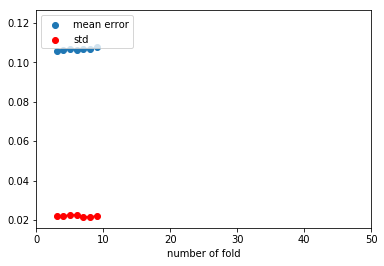

In [306]:
mean_error = []
std_error = []
kfold = range(3, 10)
for i in kfold:
    scores = ms.cross_val_score(estimator=clf, X=X, y=y, cv=ms_k5)
    mean_error.append(1 - scores.mean())
    std_error.append(scores.std())
    
import matplotlib.pyplot as plt
s1 = plt.scatter(kfold, mean_error, label='mean error')
plt.plot(kfold, mean_error)
s2 = plt.scatter(kfold, std_error, color='red', label='std')
plt.plot(kfold, std_error, color='red')
plt.xlim(0, 50)
plt.xlabel('number of fold')
plt.legend(handles=[s1, s2], loc=2)
plt.show()

### train_test_split

In [123]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.3, random_state=0)

#### parameter tuning

In [96]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

xg=ensemble.GradientBoostingRegressor()

grid_para_xg =[{'n_estimators': [30000], 'max_depth': [4], 'min_samples_split': [6], 
                 'learning_rate': [0.0023,0.002,0.0025], 'loss':['ls'], 'max_features':[18]}]

#max depth 4 #min_sample:6
#max_features 18
grid_search_xg = model_selection.GridSearchCV(xg, grid_para_xg, scoring='neg_mean_squared_error', cv=3, return_train_score=True,  n_jobs=-1)
#scoring:mse
grid_search_xg.fit(x_var, y_var)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [30000], 'max_depth': [4], 'min_samples_split': [6], 'learning_rate': [0.003, 0.002, 0.001], 'loss': ['ls'], 'max_features': [18]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [97]:
grid_search_xg.cv_results_

{'mean_fit_time': array([49.92089709, 52.47606937, 46.05956523]),
 'std_fit_time': array([ 0.653121  ,  2.61200623, 11.14731427]),
 'mean_score_time': array([0.69614077, 0.6492633 , 0.53090175]),
 'std_score_time': array([0.02045621, 0.010587  , 0.10652993]),
 'param_learning_rate': masked_array(data=[0.003, 0.002, 0.001],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_loss': masked_array(data=['ls', 'ls', 'ls'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[4, 4, 4],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[18, 18, 18],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[6, 6, 6],
              mask=[False, False, False],
        fill_value='?',
             dtype=

In [98]:
grid_search_xg.best_params_

{'learning_rate': 0.002,
 'loss': 'ls',
 'max_depth': 4,
 'max_features': 18,
 'min_samples_split': 6,
 'n_estimators': 30000}

In [99]:
grid_search_svm.best_score_

-652212483.3011055

### train test XG

MSE: 697736138.9349


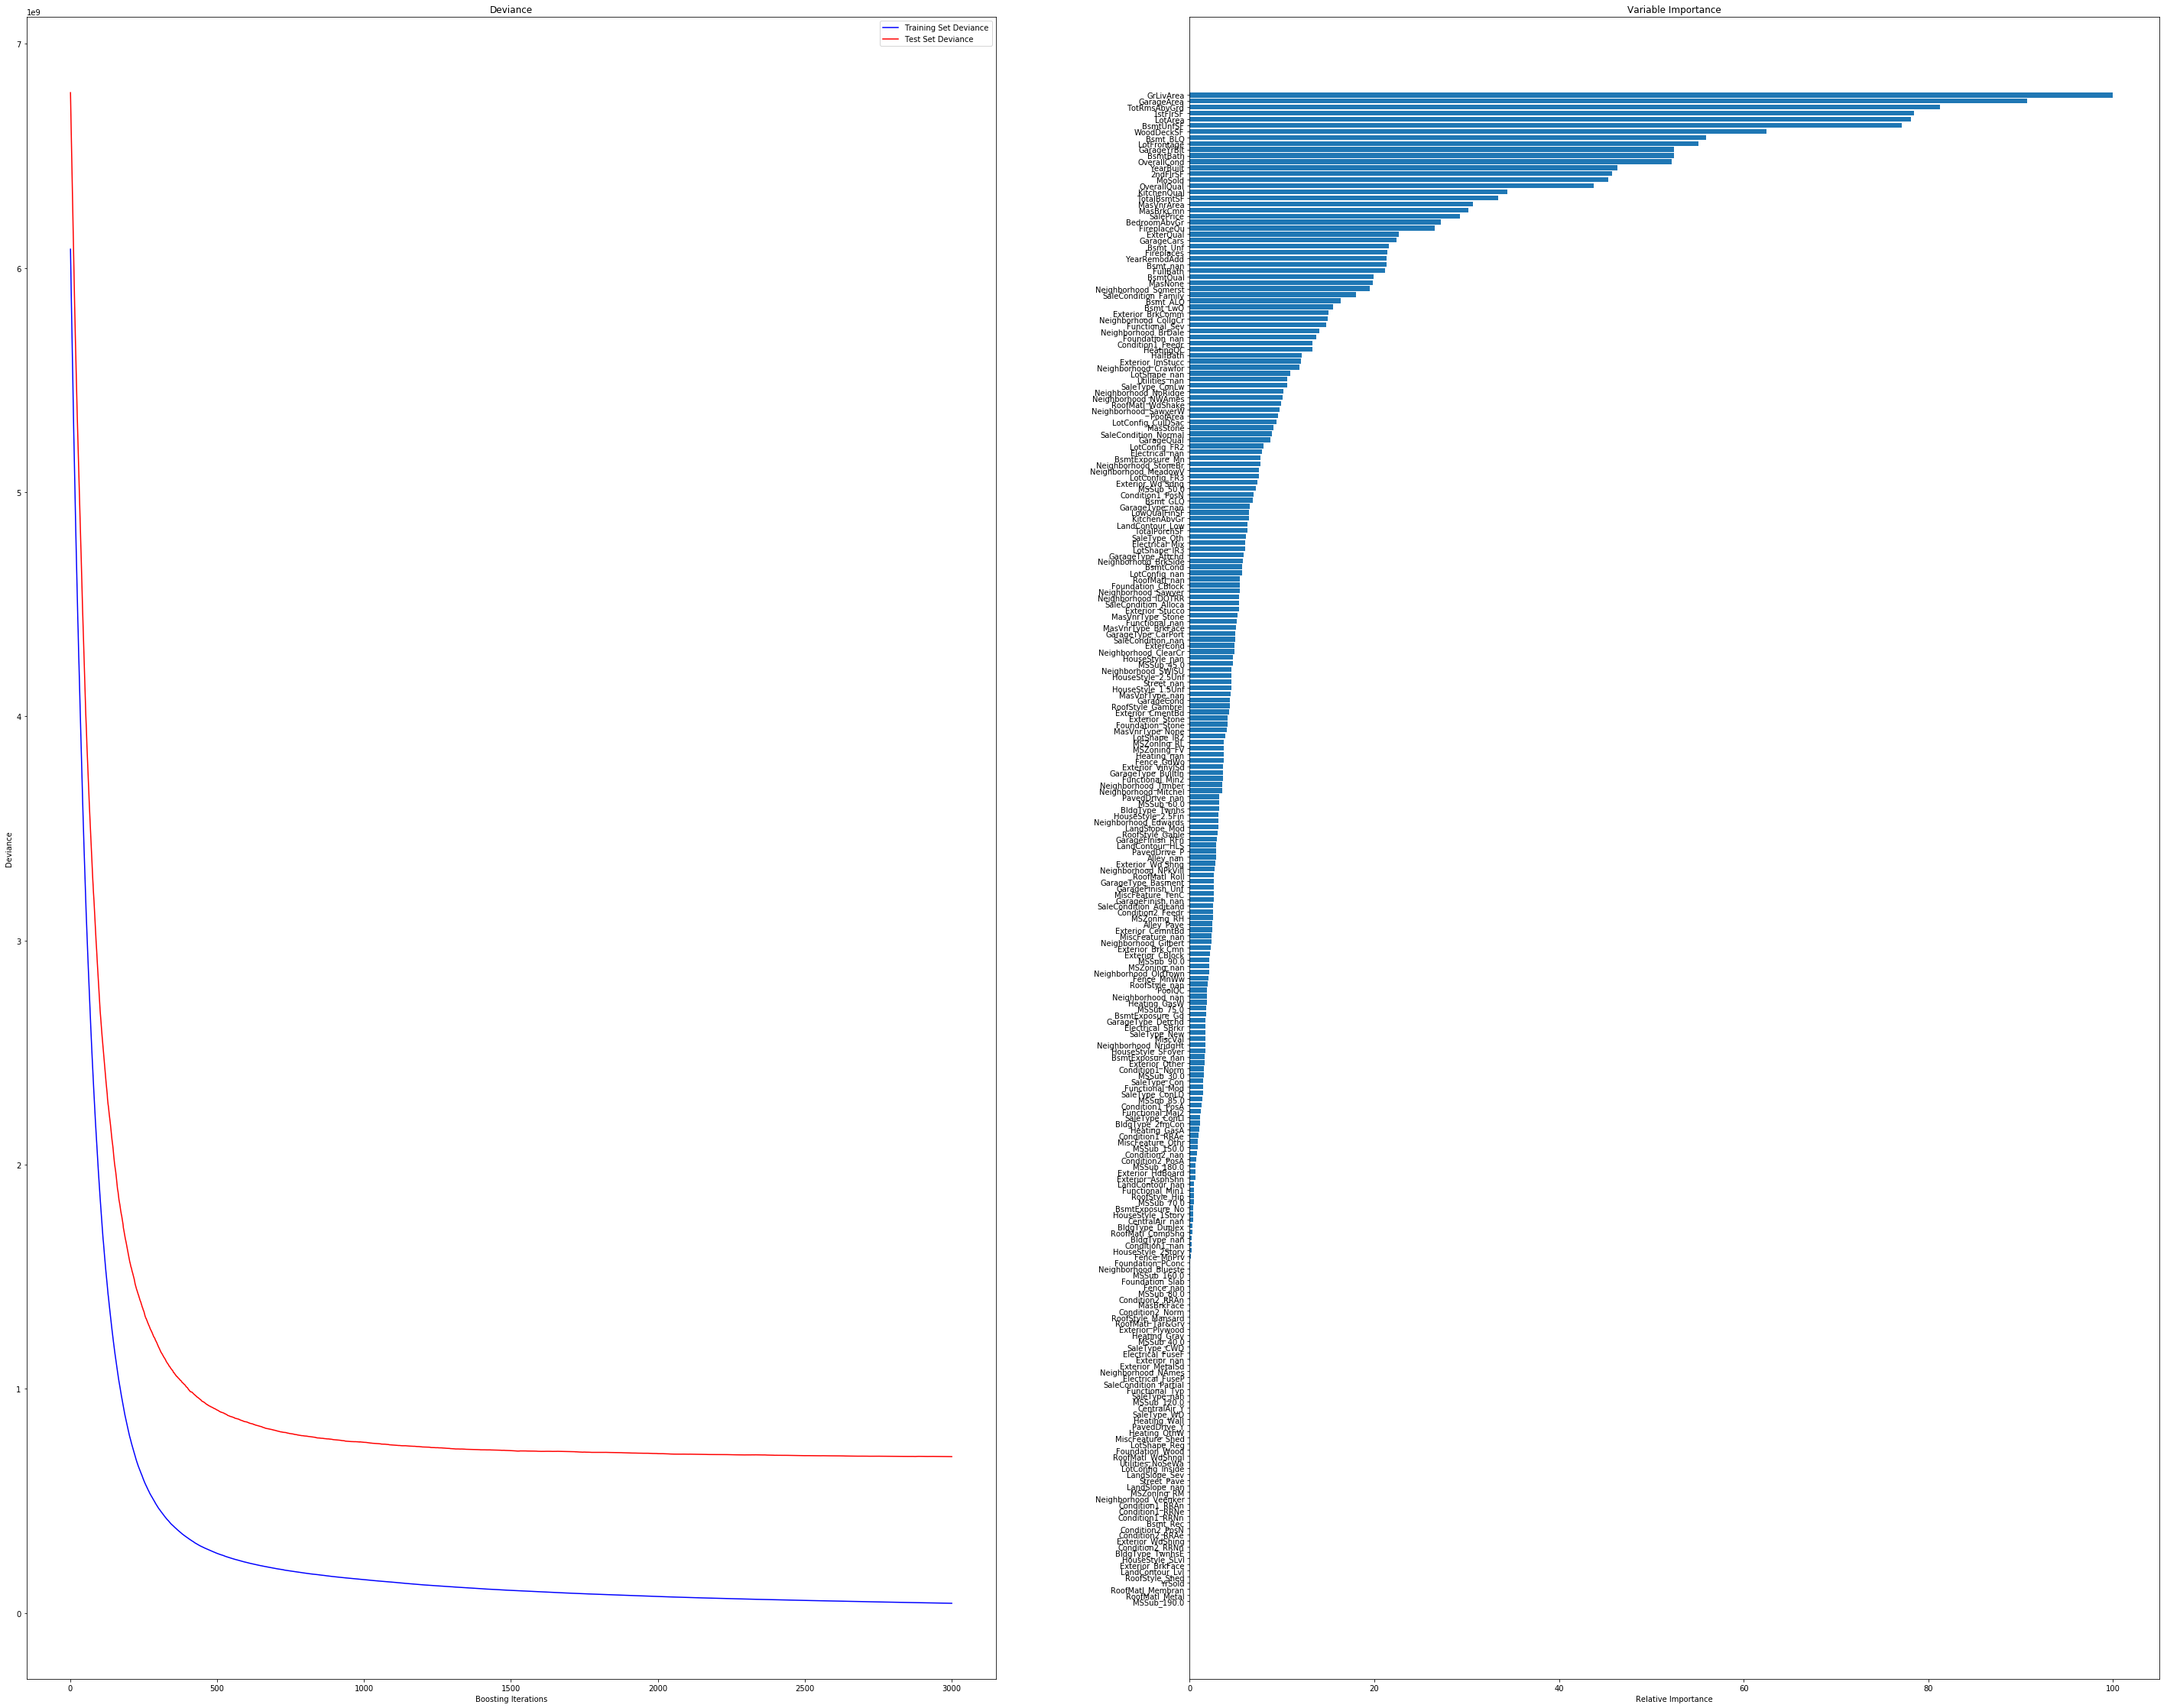

In [107]:
# from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.2, random_state=20)


from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
params={'n_estimators': 3000, 'max_depth': 4, 'min_samples_split': 6, 
                 'learning_rate': 0.01, 'loss':'ls', 'max_features':18}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
clf.predict(X_test)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(50, 40))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
          label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
          label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# # #############################################################################
# # Plot feature importance
feature_importance = clf.feature_importances_
# # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [76]:
test_score

array([7.16993382e+09, 7.16609741e+09, 7.16163658e+09, ...,
       7.25731670e+08, 7.25725682e+08, 7.25718148e+08])

In [108]:
clf.fit(x_var, y_var)
res=clf.predict(real_test_var)
res.shape

(1459,)

In [109]:
res

array([125402.34533708, 159250.18466496, 191188.66316833, ...,
       176534.46140884, 119239.69567213, 215389.35250534])

In [110]:
np.savetxt("res.csv", res, delimiter=",")

In [108]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

In [109]:
ols.fit(X=x_var,y=y_var)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
ols.coef_

array([ 3.06967150e+07,  3.06967351e+07, -4.56354685e+03, -2.21937026e+03,
        4.09262525e+03, -7.61932636e+12, -3.30177065e+03,  4.96947203e+03,
       -1.69699258e+03,  6.04843284e+03,  2.68465171e+03,  1.91564941e+01,
        4.21090719e+03, -7.81812786e+02,  7.25245518e+03, -4.72255859e+01,
       -3.06966706e+07,  3.98699666e+03,  7.76833645e+02, -1.30001412e+04,
        5.73978449e+03,  5.87890625e-01,  1.01901087e+01,  3.06966899e+07,
       -3.02744802e+12,  4.89160156e+00, -5.91355576e+02,  5.74134709e+03,
        6.86211711e+03, -1.99837189e+01,  2.12585777e+04,  2.91762245e+03,
        7.61932636e+12,  1.01615601e+01,  2.25159771e+02,  3.43666840e+00,
        2.34659005e+01, -1.14027935e+03, -1.14046422e+03,  2.57033304e+03,
        1.36034215e+04,  2.04989633e+02,  7.09966791e+03,  3.43333666e+03,
       -2.73052921e+03,  1.12265618e+04,  4.08195686e+03, -4.38813273e+04,
       -4.21995429e+03, -8.25153719e+03,  2.80236514e+03,  1.52668703e+02,
        1.05066796e+03, -

### RR  train-test-split

In [6]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(x_var, y_var) # fit data

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.3, random_state=1)

alpha_100 = np.logspace(0, 8, 100)
msetotal = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    mse = mean_squared_error(y_test, ridge.predict(X_test))
    msetotal.append(mse)

In [10]:
msetotal.min()

AttributeError: 'list' object has no attribute 'min'

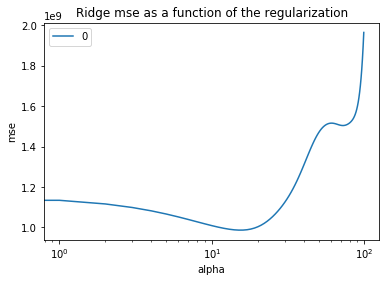

In [115]:
df_mse = pd.DataFrame(msetotal, index=list(range(100)))
import matplotlib.pyplot as plt
title = 'Ridge mse as a function of the regularization'
axes = df_mse.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('mse')
plt.show()

### PCA

In [135]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.2, random_state=20)

In [137]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [133]:
pca.n_components_

1

In [138]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

In [140]:
ridge.set_params(alpha = 100)
ridge.fit(train_img, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [141]:
mean_squared_error(y_test, ridge.predict(test_img))

6578515952.150397